<center style="font-size: 26px"> <b>Проверка уровня знаний Python</b></center>

<center style="background-color: #23B04A; color: white; font-size: 16px"><b>NumPy</b></center>

In [1]:
# обеспечиваем совместимость с Python 2 и 3
from __future__ import (absolute_import, division, print_function, unicode_literals)

# отключаем предупреждения дистрибутива Anaconda
import warnings
warnings.simplefilter('ignore')

### Практические задания:

In [2]:
# Импортируем библиотеки NumPy и Pandas - при каждом запуске тетрадки, библиотеки нужно вновь импортировать
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import chi2_contingency, mannwhitneyu
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression

In [3]:
%matplotlib inline

#### 1. Создание массивов
Создайте и перемножьте одномерный и двумерный массивы при помощи библиотеки NumPy

##### Перемножим с помощью np.dot

In [4]:
one_dim = np.arange(1,8)
two_dim = np.arange(10,59).reshape(7,7)
np.dot(one_dim, two_dim)

array([1064, 1092, 1120, 1148, 1176, 1204, 1232])

#### 2. Методы создания массивов
Создайте один и тот же массив 3-мя разными способами при помощи библиотеки NumPy

In [70]:
#Первый способ
m1 = np.array([[0, 1, 2, 3], [4, 5, 6, 7], [8, 9, 10, 11], [12, 13, 14, 15]], dtype=float)
m1

array([[ 0.,  1.,  2.,  3.],
       [ 4.,  5.,  6.,  7.],
       [ 8.,  9., 10., 11.],
       [12., 13., 14., 15.]])

In [71]:
# Второй способ
m2 = np.arange(16.0).reshape(4,4)
m2

array([[ 0.,  1.,  2.,  3.],
       [ 4.,  5.,  6.,  7.],
       [ 8.,  9., 10., 11.],
       [12., 13., 14., 15.]])

In [72]:
# Третий способ
def myfunc2(i,j):
    return i*4 + j

m3 = np.fromfunction(myfunc2, (4,4))
m3

array([[ 0.,  1.,  2.,  3.],
       [ 4.,  5.,  6.,  7.],
       [ 8.,  9., 10., 11.],
       [12., 13., 14., 15.]])

#### 3. Индексирование массивов

Напишите код, производящий указанные в комментариях операции с массивами

In [9]:
a = np.diag(np.arange(3))  # Выделите значение = 1
print('Value 1: ', a[1,1])

b = np.random.rand(5, 5)  # Выделите первую строку
print('First row: ', b[0])

c = np.arange(10) # Присвойте значение = 25 элементам массива с 3 по 6 включительно
c[2:6] = 25
print('New array: ', c)

Value 1:  1
First row:  [0.16987952 0.60841475 0.9530155  0.41207298 0.3249691 ]
New array:  [ 0  1 25 25 25 25  6  7  8  9]


#### 4. Индексирование масками

Выберите из предоставленного массива значения, делящиеся на 3 без остатка, и присвойте им значение = 10  

In [10]:
np.random.seed(3)
a = np.random.random_integers(0, 20, 15)  # предоставленный массив
a[a % 3 == 0] = 10

In [11]:
a

array([10, 10,  8, 10, 19, 10, 11, 10, 10, 10, 10, 20, 10,  7, 14])

#### 5. Меры центральной тенденции и меры вариации

Напишите код, находящий указанные в комментариях значения

In [12]:
a = np.linspace(0, 20, 5)  # Найти среднее арифметическое массива

print('Mean of a is: ', np.mean(a))

b = np.linspace(0, 30, 10)  # Найти медианное значение массива

print('Median of b is: ', np.median(b))

c = np.linspace(0, 10, 10)  # Найти кумулятивную сумму элементов массива

print('Cumsum of c is: ', np.cumsum(c))

Mean of a is:  10.0
Median of b is:  15.0
Cumsum of c is:  [ 0.          1.11111111  3.33333333  6.66666667 11.11111111 16.66666667
 23.33333333 31.11111111 40.         50.        ]


<center style="background-color: #23B04A; color: white; font-size: 16px"><b>Pandas</b></center>

#### 6. Чтение и первичная информация о файле
Выведите первые 15 значений (строк) получившегося датафрейма 

In [13]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', header=None)
df.columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 
'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'salary']

df.head(15)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


Каждая строка данного фрейма - это участник социологического опроса, проведённого в Америке 

#### 7. Индексация с условием
Вынесите в новый датафрейм с названием df_work мужчин (признак *sex*) старше 35 (признак *age*)  

In [14]:
df_work = df[(df['age'] > 35) & (df['sex'] == ' Male')] 

In [15]:
df_work.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K


#### 8. Группировка и меры центральной тенденции 
Сгруппируйте всех опрошенных по уровню образования (признак *education*) и найдите среднее значение по каждому из числовых (type = int) столбцов в каждой из получившихся групп

##### Сначала выделяем признаки типа int64, затем джойним со столбцом с образованием (индексы совпадают), потом считаем среднее для групп

In [16]:
df.select_dtypes(include='int64').join(df['education']).groupby(['education']).agg('mean')

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
education,,,,,,
10th,37.429796,196832.465166,6.0,404.574491,56.845659,37.052519
11th,32.355745,194928.077447,7.0,215.097872,50.079149,33.925957
12th,32.000000,199097.508083,8.0,284.087760,32.337182,35.780600
1st-4th,46.142857,239303.000000,2.0,125.875000,48.327381,38.255952
5th-6th,42.885886,232448.333333,3.0,176.021021,68.252252,38.897898
7th-8th,48.445820,188079.171827,4.0,233.939628,65.668731,39.366873
9th,41.060311,202485.066148,5.0,342.089494,28.998054,38.044747
Assoc-acdm,37.381443,193424.093721,12.0,640.399250,93.418932,40.504217
Assoc-voc,38.553546,181936.016643,11.0,715.051375,72.754703,41.610709


#### 9. Объединения и слияния
Объедините имеющийся датафрейм adult.data с прописанными ниже df_2 (новая колонка) и df_3 (новая строка), затем отсортируйте по признаку *age*

##### Сначала джойним, добавляем append-ом строку и сортируем результат

In [17]:
df_2 = pd.DataFrame({'random_column': np.random.rand(32561)})
df_3 = pd.DataFrame({'age': 40, 'workclass': 'Self-emp-not-inc', 'fnlwgt': 135415, 'education': 'Some-college', 'education-num': 10, 'marital-status': 'Married-civ-spouse', 'occupation': 'Other-service', 'relationship': 'Wife', 'race': 'White', 'sex': 'Female', 'capital-gain': 0, 'capital-loss': 0, 'hours-per-week': 5, 'native-country': 'United-States', 'salary': '<=50K'}, index=[32562])

df_4 = df.join(df_2).append(df_3).sort_values(by=['age'])
df_4.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary,random_column
20299,17,Private,147339,10th,6,Never-married,Prof-specialty,Own-child,Other,Female,0,0,15,United-States,<=50K,0.912815
21888,17,Private,171080,12th,8,Never-married,Handlers-cleaners,Own-child,White,Male,0,0,20,United-States,<=50K,0.427389
609,17,Private,169658,10th,6,Never-married,Other-service,Own-child,White,Female,0,0,21,United-States,<=50K,0.214143
25723,17,Private,347322,10th,6,Never-married,Sales,Own-child,White,Female,0,0,20,United-States,<=50K,0.451463
3605,17,Private,130125,10th,6,Never-married,Other-service,Own-child,Amer-Indian-Eskimo,Female,1055,0,20,United-States,<=50K,0.796610


#### 10. Применение функций 
Замените каждое значение в каждом из числовых (type = int) столбцов на среднеквадратичное отклонение по этому столбцу

##### Идет итерация по столбцам, для каждого считается стандотклон. и формируется столбец из этого показателя

In [18]:
df_transformed = df.apply(lambda x: [x.std()] * len(x) if x.dtype == 'int64' else x)

In [19]:
df_transformed.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,13.640433,State-gov,105549.977697,Bachelors,2.57272,Never-married,Adm-clerical,Not-in-family,White,Male,7385.292085,402.960219,12.347429,United-States,<=50K
1,13.640433,Self-emp-not-inc,105549.977697,Bachelors,2.57272,Married-civ-spouse,Exec-managerial,Husband,White,Male,7385.292085,402.960219,12.347429,United-States,<=50K
2,13.640433,Private,105549.977697,HS-grad,2.57272,Divorced,Handlers-cleaners,Not-in-family,White,Male,7385.292085,402.960219,12.347429,United-States,<=50K
3,13.640433,Private,105549.977697,11th,2.57272,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,7385.292085,402.960219,12.347429,United-States,<=50K
4,13.640433,Private,105549.977697,Bachelors,2.57272,Married-civ-spouse,Prof-specialty,Wife,Black,Female,7385.292085,402.960219,12.347429,Cuba,<=50K


<center style="background-color: #23B04A; color: white; font-size: 16px"><b>EDA по доходу населения UCI Adult</b></center>

### Практические задания:

#### Обновляем файл adult.data.csv и решаем задания ниже на нём

In [20]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', header=None)
df.columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 
'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'salary']

Уникальные значения признаков в датафрейме:
- age: continuous.
- workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
- fnlwgt: continuous.
- education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
- education-num: continuous.
- marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
- occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
- relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
- race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
- sex: Female, Male.
- capital-gain: continuous.
- capital-loss: continuous.
- hours-per-week: continuous.
- native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.   
- salary: >50K,<=50K

#### 11. Каков средний возраст (признак *age*) мужчин?

In [21]:
df[df['sex'] == ' Male']['age'].mean()

39.43354749885268

#### 12. Каковы средние значения и среднеквадратичные отклонения возраста тех, кто получает более 50K в год (признак *salary*) и тех, кто получает менее 50K в год? **

In [22]:
print('Average age and stand. dev. of age of people with salary >50K: ', df[df['salary'] == ' >50K']['age'].mean(), df[df['salary'] == ' >50K']['age'].std())
print('Average age and stand. dev. of age of people with salary <=50K: ', df[df['salary'] == ' <=50K']['age'].mean(), df[df['salary'] == ' <=50K']['age'].std())

Average age and stand. dev. of age of people with salary >50K:  44.24984058155847 10.51902771985177
Average age and stand. dev. of age of people with salary <=50K:  36.78373786407767 14.020088490824813


**13. Найдите таким образом максимальный возраст мужчин расы *Amer-Indian-Eskimo*.**

In [23]:
print('Maximum age of male of Amer-Indian-Eskimo: ', df[(df['race'] == ' Amer-Indian-Eskimo') & (df['sex'] == ' Male')]['age'].max())

Maximum age of male of Amer-Indian-Eskimo:  82


**14. Какое максимальное число часов человек работает в неделю (признак *hours-per-week*)? Сколько людей работают такое количество часов и каков среди них процент зарабатывающих много (*salary* >50k)?**

In [24]:
max_hours = df['hours-per-week'].max()
df_maxhours = df[df['hours-per-week']==max_hours]
print('Maximum hour-per-week: ', max_hours)
print('Number of people working on maximum hours: ', df_maxhours.shape[0])
print('Percentage of them earning much: ', round(df_maxhours[df_maxhours['salary'] == ' >50K'].shape[0]/df_maxhours.shape[0]*100, 2))

Maximum hour-per-week:  99
Number of people working on maximum hours:  85
Percentage of them earning much:  29.41


**15. Посчитайте среднее время работы (*hours-per-week*) зарабатывающих мало и много (*salary*) для каждой страны (*native-country*).**

##### Проще это сделать группировкой по странам, потом по виду зарплаты и затем для признака времени взять среднее. Как видно, в датафрейме есть неопределенные страны

In [25]:
df[['hours-per-week', 'salary', 'native-country']].groupby(['native-country', 'salary']).agg('mean')

hours-per-week
native-country salary                
 ?              <=50K       40.164760
                >50K        45.547945
 Cambodia       <=50K       41.416667
                >50K        40.000000
 Canada         <=50K       37.914634
...                               ...
 United-States  >50K        45.505369
 Vietnam        <=50K       37.193548
                >50K        39.200000
 Yugoslavia     <=50K       41.600000
                >50K        49.500000

[82 rows x 1 columns]

<center style="background-color: #23B04A; color: white; font-size: 16px"><b>Анализ данных по доходу населения UCI Adult</b></center>

Попробуйте написать модель, предсказывающую уровень дохода ('salary') людей на основе датасета UCI Adult.

Напишите код: 
- для подготовки данных,
- для обучения модели (одной или нескольких - решать Вам),
- для оценки качества модели.

Итоговый результат - модель + получившиеся метрики качества.

#### 1) Подготовим данные

##### Пропущенных значений NAN нет

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


##### Было заметно, что есть пропуски в виде ?, найдем их. Они есть только для трех категориальных признаков, причем пропуски в occupation, workclass зачастую совпадают для человека.

In [27]:
print('Колво пропусков в occupation: ', df[df['occupation'] == ' ?'].shape[0])
print('Колво пропусков в workclass: ', df[df['workclass'] == ' ?'].shape[0])
print('Колво пропусков в native-country: ', df[df['native-country'] == ' ?'].shape[0])

Колво пропусков в occupation:  1843
Колво пропусков в workclass:  1836
Колво пропусков в native-country:  583


##### Пропусков не столь много относительно всего датфрейма, поэтому в данном случае будет разумнее не заполнять их медианой, наиболее часто встречающимися значенями по столбцу, а можно и убрать из выборки людей, для которых пропущены наблюдения. С удалением наблюдений с пропусками ушло значение признака workclass - Never-worked. Но оно составляло всего 7 наблюдений, поэтому его все равно объединили бы в больший класс, так что проблемы в этом не должно быть.

In [28]:
data = df[df['occupation'] != ' ?']
data = data[data['workclass'] != ' ?']
data = data[data['native-country'] != ' ?']

##### Посмотрим на смысл наших признаков. Из описания к данным ясно, что education и education-num - одно и то же, удалим education. Также в описании признаков в UCI написано, что fnlwgt - это final weight, это просто величина выборки, которая никак не влияет на зараплату, также удалим ее.

In [29]:
data.drop(['fnlwgt', 'education'], inplace=True, axis=1)

In [30]:
data.head()

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


#### 2) Проведем EDA, чтобы узнать больше о наших данных, распределениях в них

##### Начнем с некоторых категориальных признаков

##### Первый признак - workclass

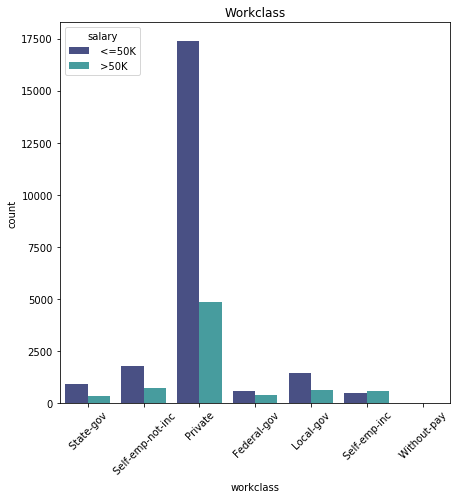

In [31]:
plt.figure(figsize=(7,7))
sns.countplot(x="workclass", hue='salary', data=data, palette="mako")
plt.xticks(rotation=45)
plt.title('Workclass')
plt.show()

##### Почти везде большинство людей получают менее 50к, пропорции в разбиении по зарплате примерно одинаковые. Заметно, что очень выделяется частный сектор, также видно, что есть самозяанятые (self-emp-not-inc, self-emp-inc) и государственный сектор (state-gov, federal-gov, local-gov). Останется лишь 14 объектов с without-pay, они будут отдельно четвертым значением workclass.

In [32]:
data['workclass-new'] = np.where((data['workclass']==' State-gov') | (data['workclass']==' Federal-gov') | (data['workclass']==' Local-gov'), 'FSL-gov', data['workclass'])
data['workclass-new'] = np.where((data['workclass-new']==' Self-emp-not-inc') | (data['workclass-new']==' Self-emp-inc'), 'Self-employed', data['workclass-new'])

In [33]:
data['workclass-new'].value_counts()

 Private         22286
FSL-gov           4289
Self-employed     3573
 Without-pay        14
Name: workclass-new, dtype: int64

In [34]:
data.drop(['workclass'], axis=1, inplace=True)

##### Второй признак - marital-status

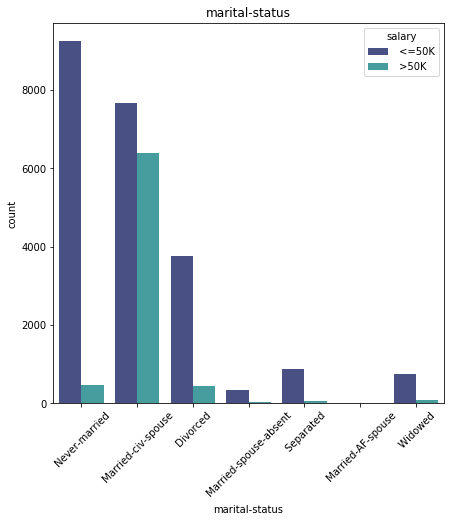

In [35]:
plt.figure(figsize=(7,7))
sns.countplot(x="marital-status", hue='salary', data=data, palette="mako")
plt.xticks(rotation=45)
plt.title('marital-status')
plt.show()

##### Здесь также из названия значений признаков можно понять, что есть три основные категории - замужем/жентат, никогда не был замужем/женат, был замужем/женат но в данный момент нет. Объединим таким образом наши значения признака.

In [36]:
data['marital-stat-new'] = np.where((data['marital-status']==' Widowed') | (data['marital-status']==' Divorced') | (data['marital-status']==' Separated'), 'Notmarried-now', data['marital-status'])
data['marital-stat-new'] = np.where((data['marital-stat-new']==' Married-AF-spouse') | (data['marital-stat-new']==' Married-spouse-absent') | (data['marital-stat-new']==' Married-civ-spouse'), 'Married', data['marital-stat-new'])

In [37]:
data['marital-stat-new'].value_counts()

Married           14456
 Never-married     9726
Notmarried-now     5980
Name: marital-stat-new, dtype: int64

In [38]:
data.drop(['marital-status'], axis=1, inplace=True)

##### Третий - occupation. Тут довольно много профессий и надо разбираться в их тонкостях для группировки, поэтому не будем изменять колонку.

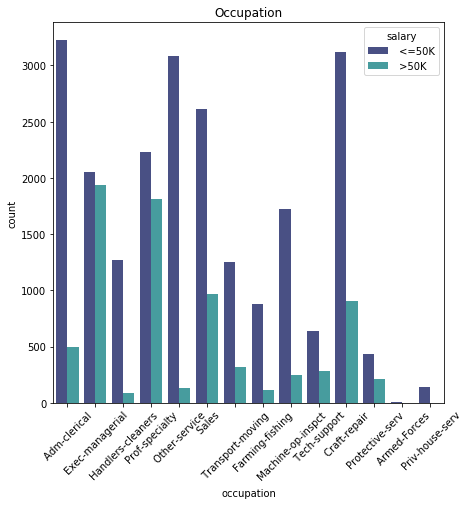

In [39]:
plt.figure(figsize=(7,7))
sns.countplot(x="occupation", hue='salary', data=data, palette="mako")
plt.xticks(rotation=45)
plt.title('Occupation')
plt.show()

##### Четвертое - Relationship, race, sex - также включают в себя самодостаточные вариации своих значений, поэтому их не надо внутри каким-то образом объединять. Видно, что со статусом муж больше людей зарабатывают >50K, чем с другими статусами. Также в white race в принцепи больше наблюдений и там тоже примерно четверть людей зарабатывает >50K.

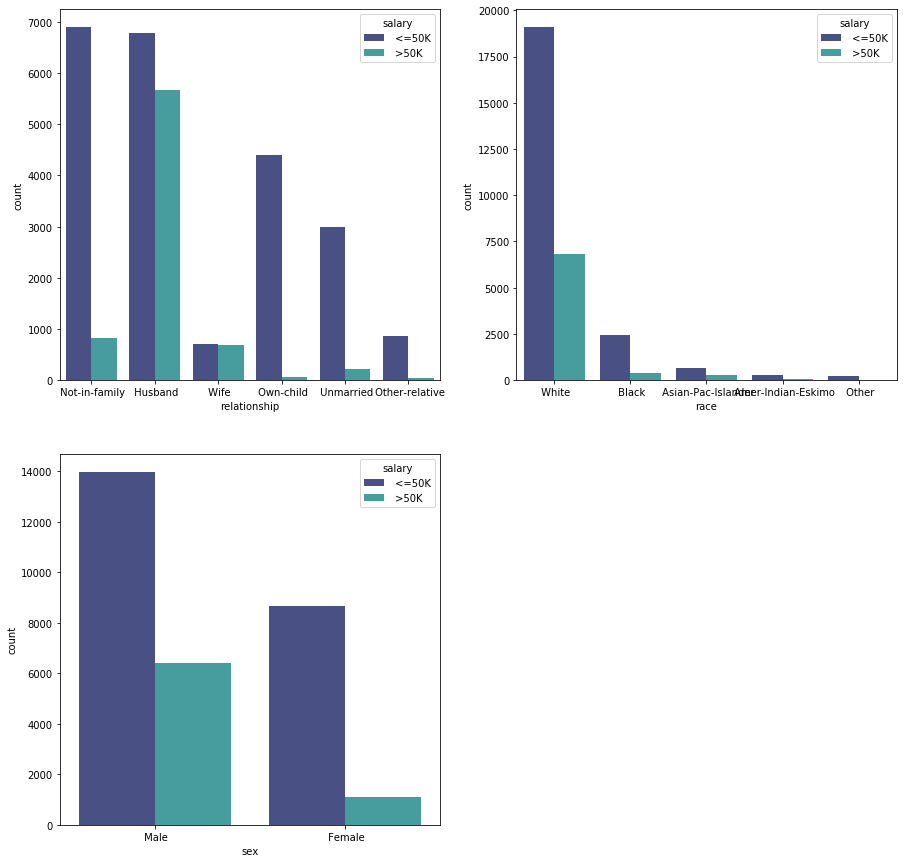

In [40]:
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_size_inches(15,15)
titles = ['relationship', 'race', 'sex']
for i, name in enumerate(titles):
    
    sns.countplot(x=name, hue='salary', data=data, palette="mako", ax = axes[i//2, i%2])

fig.delaxes(axes[1,1])

##### Пятое - страны. Есть главная группа - US, остальные конечно представлены в куда меньшем объеме. Попытаемся объединить по географическому признаку.

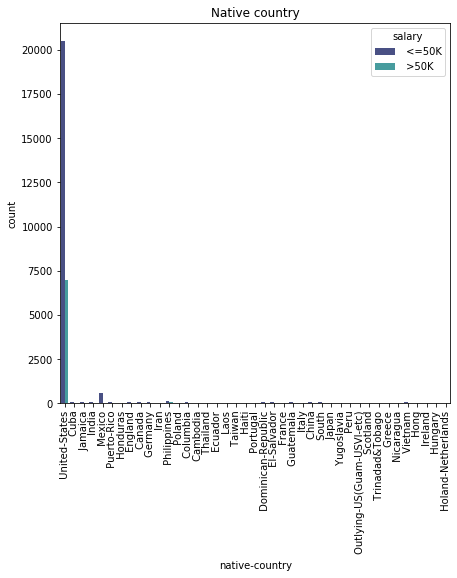

In [41]:
plt.figure(figsize=(7,7))
sns.countplot(x="native-country", hue='salary', data=data, palette="mako")
plt.xticks(rotation=90)
plt.title('Native country')
plt.show()

In [42]:
europe = [' England', ' Germany', ' Poland', ' Portugal', ' France', ' Italy', ' Yugoslavia', ' Scotland', ' Greece', ' Ireland', ' Hungary', ' Holand-Netherlands']
asia = [' India', ' Iran', ' Cambodia', ' Thailand', ' Laos', ' Taiwan', ' China', ' Japan', ' Vietnam', ' Hong', ' Philippines']
south_america = [' Columbia', ' Ecuador', ' Peru', ' South']

In [43]:
data['country-new'] = np.where(data['native-country'].isin(europe), 'europe', data['native-country'])
data['country-new'] = np.where(data['country-new'].isin(asia), 'asia', data['country-new'])
data['country-new'] = np.where(data['country-new'].isin(south_america), 'south-america', data['country-new'])
data['country-new']= np.where((data['country-new']!= 'asia') & (data['country-new']!= 'europe') & (data['country-new']!= 'south-america'), 'north-america', data['country-new'])

In [44]:
data['country-new'].value_counts()

north-america    28851
asia               634
europe             493
south-america      184
Name: country-new, dtype: int64

In [45]:
data.drop(['native-country'], axis=1, inplace=True)

##### Шестое - наши классы по зарплате. Очень важно посмотреть на баланс классов, чтобы в зависимости от этого в дальнейшем брать метрику для алгоритма. Классы несбалансированы.

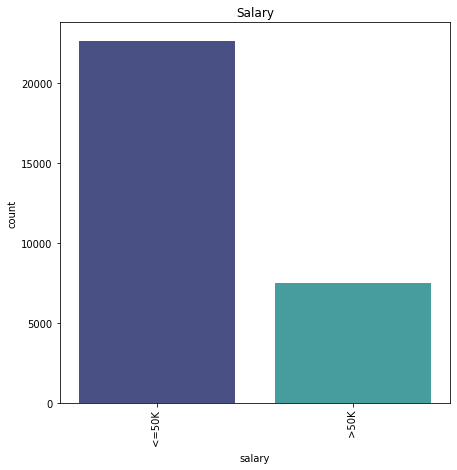

In [46]:
plt.figure(figsize=(7,7))
sns.countplot(x="salary", data=data, palette="mako")
plt.xticks(rotation=90)
plt.title('Salary')
plt.show()

##### Посмотрим на гистограммы частот для continous переменных. Видно, что распределения очень скошены, необходимо для дальнейшей работы модели нормализовать их.

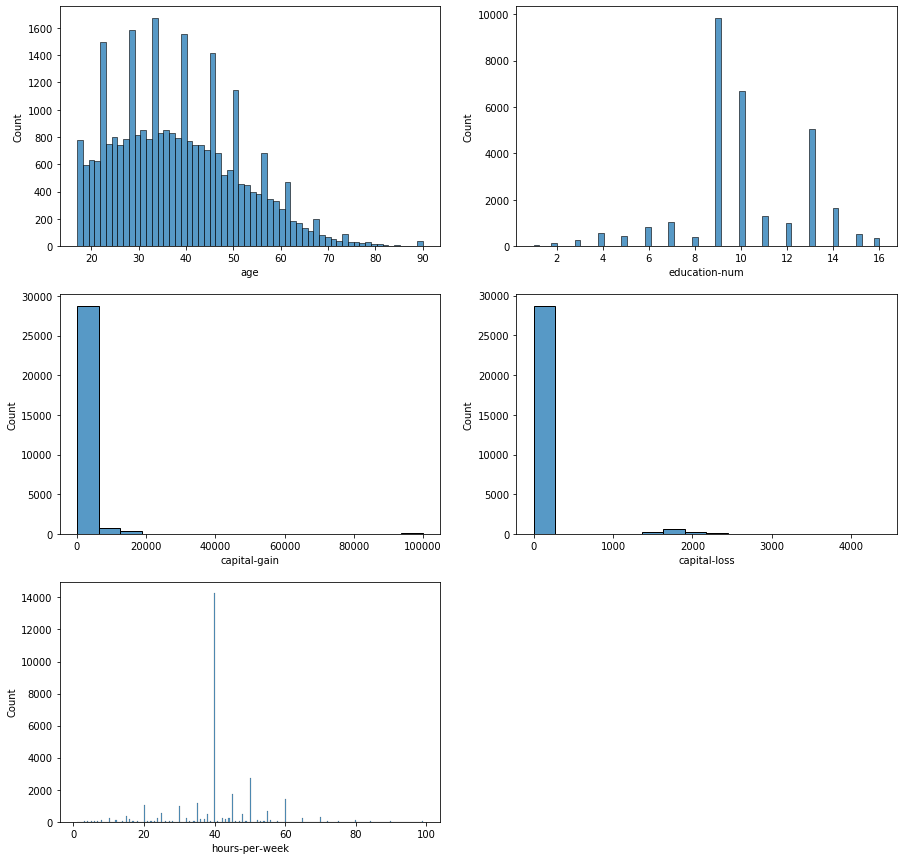

In [47]:
fig, axes = plt.subplots(nrows=3, ncols=2)
fig.set_size_inches(15,15)
titles = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
for i, name in enumerate(titles):
    
    sns.histplot(data=data, x=name, palette="mako", ax = axes[i//2, i%2])

fig.delaxes(axes[2,1])

##### Нормализация признаков

In [48]:
scaler = MinMaxScaler()
data[titles] = scaler.fit_transform(data[titles])

In [49]:
data.head()

,age,education-num,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,salary,workclass-new,marital-stat-new,country-new
0,0.301370,0.800000,Adm-clerical,Not-in-family,White,Male,0.02174,0.0,0.397959,<=50K,FSL-gov,Never-married,north-america
1,0.452055,0.800000,Exec-managerial,Husband,White,Male,0.00000,0.0,0.122449,<=50K,Self-employed,Married,north-america
2,0.287671,0.533333,Handlers-cleaners,Not-in-family,White,Male,0.00000,0.0,0.397959,<=50K,Private,Notmarried-now,north-america
3,0.493151,0.400000,Handlers-cleaners,Husband,Black,Male,0.00000,0.0,0.397959,<=50K,Private,Married,north-america
4,0.150685,0.800000,Prof-specialty,Wife,Black,Female,0.00000,0.0,0.397959,<=50K,Private,Married,north-america


##### Посмотрим на корреляцию между вышеперечисленными признаками. Видно, что она везде не выше 0.4, это довольно неплохое качество. Ярко выраженно мультиколлениарности нет.

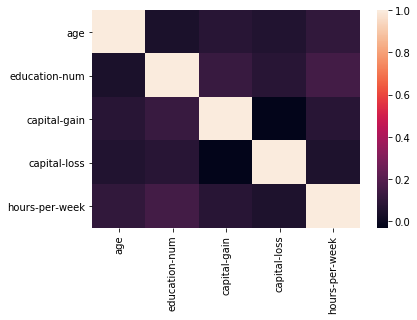

In [50]:
sns.heatmap(data[titles].corr())

##### Также для continous признаков сделаем такую вещь: для каждого такого признака разделим датасет на две части (с salary > 50K и меньше). Дале проведем критерий Манна-Уитни для двух независимых выборок и посмотрим на p-value, значимы ли различия или нет. Видим, что везде различия значимы. То есть, медианные значения признака для людей с зарплатой >50k и менее, значимо различаются. Значит, эти признаки скорее всего важны, по ним можно обучать модель.

In [51]:
def mannwh(df_num):
    df_num_h50 = df_num[df_num['salary']==' >50K']
    df_num_l50 = df_num[df_num['salary']==' <=50K']
    
    for col in df_num.columns:
        if col != 'salary':
            stat, p = mannwhitneyu( df_num_h50[col], df_num_l50[col])      
            print(col, ' and salary p-value: ', p)

In [52]:
mannwh(data.select_dtypes(include='float64').join(data['salary']))

age  and salary p-value:  0.0
education-num  and salary p-value:  0.0
capital-gain  and salary p-value:  0.0
capital-loss  and salary p-value:  2.254015315109914e-131
hours-per-week  and salary p-value:  0.0


##### Далее еще посмотрим на корреляцию качественных признаков с salary. Для качественных признаков рассчитаем кртерий Хи-квадрат и проверим его значимость. Видно, что везде p-value сильно меньше 0.05, гипотеза о независимости везде отвергается.

In [53]:
def chi2(df_cat):
    for col in df_cat.columns:
        if col != 'salary':
            df_cat[col]
            obs = pd.crosstab(df_cat[col], df_cat['salary'],  margins = False)
            chi2, p, dof, ex = chi2_contingency(obs, correction = True)
            print(col, ' and salary p-value: ', p)

In [54]:
chi2(data.select_dtypes(include=['object']))

occupation  and salary p-value:  0.0
relationship  and salary p-value:  0.0
race  and salary p-value:  1.3178285203762715e-64
sex  and salary p-value:  1.00155254124934e-309
workclass-new  and salary p-value:  1.4066620295727715e-99
marital-stat-new  and salary p-value:  0.0
country-new  and salary p-value:  4.862744898106684e-09


##### Переведем категориальные признаки кроме salary в dummy-variables.

In [55]:
X = pd.get_dummies(data.drop(['salary'], axis=1))

In [56]:
y = data[['salary']]

#### 3) Перейдем к построению моделей. Попробуем две: случайный лес и логистическую регрессию.

##### a) Случайный лес

##### Разделим выборку на train и test, не забываем, что имеется разбалансировка классов по salary, надо сделать стратификацию, сохранив балансы классов в train и test. По умолчанию используется StratifiedKFold на 5 фолдов.
##### Будем оценивать качество работы алгоритма с помощью метрики площади под AUC-ROC кривой, она хороша для несбалансированной выборки, поэтому на ней и будем обучать модель. Если значение близко к единице, то модель хороша.

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, shuffle=True, random_state=2020)

In [58]:
clf = RandomForestClassifier(random_state=2020)

In [59]:
grid_param = {
    'n_estimators': [300],
    'max_depth': [15, 20, 25, 30, 45],
    'criterion': ['gini', 'entropy'],
    'bootstrap': [True, False]
}

##### Будем испольовать поиск по сетке для подбора параметров.

In [60]:
gd_sr = GridSearchCV(estimator=clf,
                     param_grid=grid_param,
                     scoring='roc_auc’,
                     cv=5,
                     n_jobs=-1)

In [61]:
gd_sr.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

##### Выведем лучшие параметры для классификатора и значение метрики auc-roc на лучшем лесе.

In [62]:
best_parameters = gd_sr.best_params_
best_result = gd_sr.best_score_
print('Лучшие параметры: ', best_parameters)
print('Лучшая auc-roc метрика: ', round(best_result, 2))

Лучшие параметры:  {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 15, 'n_estimators': 300}
Лучшая auc-roc метрика:  0.92


In [63]:
predictions = gd_sr.predict(X_test)

##### Выведем метрики на тестовом отложенном фрейме

In [66]:
def metrics(y_test, pred):
    CM = confusion_matrix(y_test, pred)
    TN = CM[0][0]
    FN = CM[1][0]
    TP = CM[1][1]
    FP = CM[0][1]
    accuracy = round((TN+TP)/(FN+FP+TN+TP), 2)
    precision = round((TP)/(FP+TP), 2)
    recall = round((TP)/(FN+TP), 2)
    F_score = round((2*precision*recall)/(precision+recall),2)
    return accuracy, F_score

In [67]:
accuracy, F_score = metrics(y_test, predictions)
print('Доля верных ответов: ', accuracy)
print('F-score: ', F_score)

Доля верных ответов:  0.86
F-score:  0.67


##### б) Логистическая регрессия

In [68]:
lr = LogisticRegression(solver='newton-cg', random_state=2020)
lr.fit(X_train, y_train)
lr_predictions = lr.predict(X_test)

In [69]:
accuracy, F_score = metrics(y_test, lr_predictions)
print('Доля верных ответов: ', accuracy)
print('F-score: ', F_score)

Доля верных ответов:  0.85
F-score:  0.66


#### Вывод: классификаторы работают плюс минус на одном уровне (это можно понять по accuracy, F-мере). С моей точки зрения, лучше выбрать случайный лес, так как он показывает довольно высокое значение auc-roc метрики и также, имея больше вычислительных ресурсов, можно подобрать неплохие параметры для входящих в состав алгоритма деревьев.